# Homework 0

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure
import matplotlib.patches as patches
from ipywidgets import interact, IntSlider

In [3]:
frame_paths = sorted(glob.glob(os.path.join('frames', '*')))

# load each image, convert to grayscale and store in a list
frames_list = []
for path in frame_paths:
    img = io.imread(path)
    # convert to grayscale if in color
    if img.ndim == 3:
        img_gray = color.rgb2gray(img)
    else:
        img_gray = img
    frames_list.append(img_gray)

# convert the list to a NumPy array of shape (N, height, width)
frames = np.array(frames_list)
print("Frames shape:", frames.shape)

Frames shape: (50, 240, 320)


In [4]:
def show_video(x,cmap=None):
    def f(i):
        plt.imshow(x[i],cmap=cmap)
    interact(f, i=IntSlider(min=0, max=len(x)-1, step=1, value=0))

# Display the video using the grayscale frames
show_video(frames, cmap='gray')

interactive(children=(IntSlider(value=0, description='i', max=49), Output()), _dom_classes=('widget-interact',…

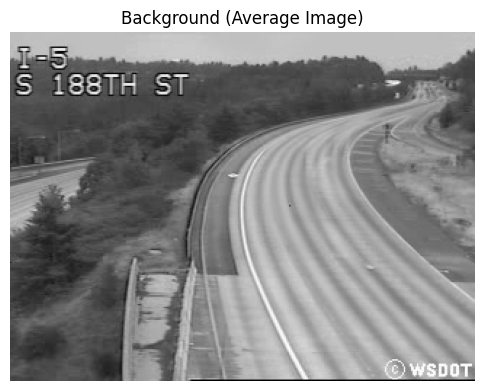

In [5]:
# get the per-pixel average of the video to obtain the "background" image.
background = np.mean(frames, axis=0)

plt.figure(figsize=(6,6))
plt.imshow(background, cmap='gray')
plt.title("Background (Average Image)")
plt.axis('off')
plt.show()

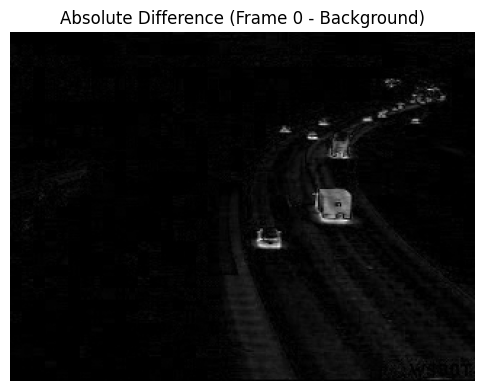

In [6]:
# get the absolute difference between the background and the first frame.
abs_diff = np.abs(frames[0] - background)

plt.figure(figsize=(6,6))
plt.imshow(abs_diff, cmap='gray')
plt.title("Absolute Difference (Frame 0 - Background)")
plt.axis('off')
plt.show()

In [7]:
# Otsu's method to get a threshold on the absolute difference image.
threshold_value = filters.threshold_otsu(abs_diff)
print("Otsu's threshold:", threshold_value)

Otsu's threshold: 0.1402600424325981


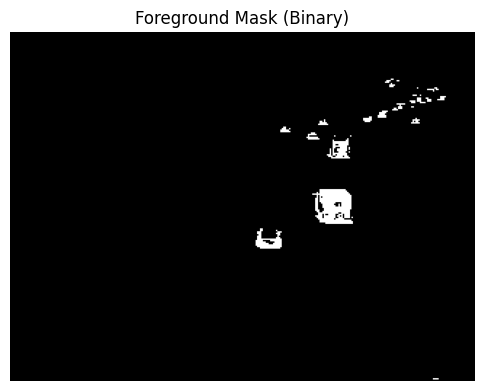

In [8]:
# threshold the absolute difference image to obtain a binary mask (foreground mask).
mask = abs_diff > threshold_value

plt.figure(figsize=(6,6))
plt.imshow(mask, cmap='gray')
plt.title("Foreground Mask (Binary)")
plt.axis('off')
plt.show()

In [9]:
# applying the threshold to each frame to get the foreground masks.
# create a binary mask for each frame based on the threshold value.
masks = np.array([np.abs(frame - background) > threshold_value for frame in frames])
show_video(masks, cmap='gray')

interactive(children=(IntSlider(value=0, description='i', max=49), Output()), _dom_classes=('widget-interact',…

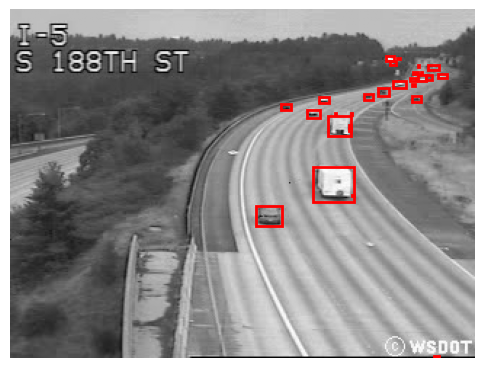

In [11]:
# single frame: find connected components and put bounding boxes around each detected blob.
def draw_bounding_boxes(frame, mask):
    fig, ax = plt.subplots(1, figsize=(6,6))
    ax.imshow(frame, cmap='gray')
    # label connected regions in the mask
    labels = measure.label(mask)
    regions = measure.regionprops(labels)
    for props in regions:
        minr, minc, maxr, maxc = props.bbox
        # drawing a red bounding box around the detected blob
        rect = patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
    ax.axis('off')
    plt.show()

# first frame and its corresponding mask
draw_bounding_boxes(frames[0], masks[0])

In [12]:
# video that displays bounding boxes on each frame.
def show_bounding_boxes_video(frames, masks):
    def f(i):
        fig, ax = plt.subplots(1, figsize=(6,6))
        ax.imshow(frames[i], cmap='gray')
        labels = measure.label(masks[i])
        regions = measure.regionprops(labels)
        for props in regions:
            minr, minc, maxr, maxc = props.bbox
            rect = patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                     linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
        ax.axis('off')
        plt.show()
    interact(f, i=IntSlider(min=0, max=len(frames)-1, step=1, value=0))

show_bounding_boxes_video(frames, masks)

interactive(children=(IntSlider(value=0, description='i', max=49), Output()), _dom_classes=('widget-interact',…